## Principal component analysis

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
# Data treatment
# ==============================================================================
import pandas as pd
import numpy as np

# Graphics
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [ ]:
# We load the data
cancer_data = load_breast_cancer()
df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)

# And we show some variables on the screen
print(df.head())
print(df.describe())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# We scaled the data taking into account the mean and standard deviation of each variable
scaler.fit(df.values)
X_scaled = scaler.transform(df.values)
print("X_scaled:\n", X_scaled)

X_scaled:
 [[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [ ]:
# We are going to use Sci-kit learn functions for PCA analysis
from sklearn.decomposition import PCA

# To evaluate the results, we will use the full set of variables 
pca = PCA(n_components=30, random_state=2020)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

# The above variable stores the values ​​of the (30) principal components
print("X_pca:\n", X_pca)

# Since we select the complete set of variables, the components
# selected must account for 100% of the variance in the data
print("\n => Variance explained by the components:", sum(pca.explained_variance_ratio_ * 100))

X_pca:
 [[ 9.19283683e+00  1.94858307e+00 -1.12316616e+00 ... -3.39144536e-02
   4.56477199e-02 -4.71692081e-02]
 [ 2.38780180e+00 -3.76817174e+00 -5.29292687e-01 ...  3.26241827e-02
  -5.68742432e-03 -1.86787626e-03]
 [ 5.73389628e+00 -1.07517380e+00 -5.51747593e-01 ...  4.70258247e-02
   3.14589659e-03  7.50534755e-04]
 ...
 [ 1.25617928e+00 -1.90229671e+00  5.62730526e-01 ... -2.57775589e-03
   6.70621179e-03  3.77041667e-03]
 [ 1.03747941e+01  1.67201011e+00 -1.87702933e+00 ... -6.80863833e-02
  -8.41632764e-02 -2.37828222e-02]
 [-5.47524330e+00 -6.70636791e-01  1.49044308e+00 ... -9.51587894e-03
  -6.09131090e-02 -1.94755854e-02]]

 => Variance explained by the components: 100.00000000000001


Text(0, 0.5, 'Percent Variance Explained')

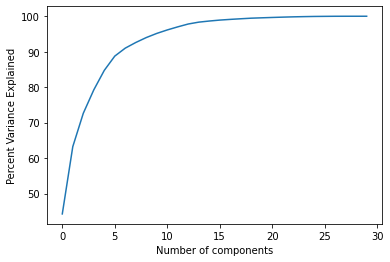

In [ ]:
# If we represent the variance as a function of the number of components, we can observe
# what is the minimum number of components that we will need to explain a certain
# percent variance
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Percent Variance Explained")

In [ ]:
# We see that with only a third of the variables we can explain 95% of the variance
n_var = np.cumsum(pca.explained_variance_ratio_ * 100)[9]
print("Variance of the first 10 components:", n_var)

Variance of the first 10 components: 95.15688143366667


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


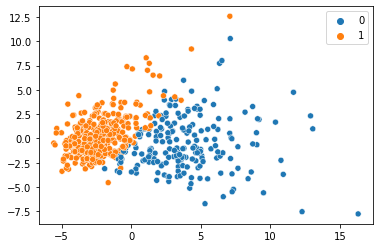

In [ ]:
# Alternatively, we can build the set that accommodates 95% of the variance
# as follows
pca_95 = PCA(n_components=0.95, random_state=2020)
pca_95.fit(X_scaled)
X_pca_95 = pca_95.transform(X_scaled)

# A good practice is to visualize the relationship of the main components
import seaborn as sns

sns.scatterplot(X_pca_95[:, 0], X_pca_95[:, 1], hue=cancer_data.target);

In [ ]:
# Finally we can create a new data frame with the result of the PCA analysis
cols = ['PCA' + str(i) for i in range(10)]
df_pca = pd.DataFrame(X_pca_95, columns=cols)
print("Data (PCA - 95%):\n", df_pca)


Data (PCA - 95%):
           PCA0       PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
0     9.192837   1.948583 -1.123166  3.633731 -1.195110  1.411424  2.159370   
1     2.387802  -3.768172 -0.529293  1.118264  0.621775  0.028656  0.013358   
2     5.733896  -1.075174 -0.551748  0.912083 -0.177086  0.541452 -0.668166   
3     7.122953  10.275589 -3.232790  0.152547 -2.960878  3.053422  1.429911   
4     3.935302  -1.948072  1.389767  2.940639  0.546747 -1.226495 -0.936213   
..         ...        ...       ...       ...       ...       ...       ...   
564   6.439315  -3.576817  2.459487  1.177314 -0.074824 -2.375193 -0.596130   
565   3.793382  -3.584048  2.088476 -2.506028 -0.510723 -0.246710 -0.716326   
566   1.256179  -1.902297  0.562731 -2.089227  1.809991 -0.534447 -0.192758   
567  10.374794   1.672010 -1.877029 -2.356031 -0.033742  0.567936  0.223082   
568  -5.475243  -0.670637  1.490443 -2.299157 -0.184703  1.617837  1.698952   

         PCA7      PCA8      PCA

## Independent Component Analysis (ICA)

In [ ]:
# We will use fMRI data for our ICA example
# To do this, we start by installing the nilearn library  
!python -m pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from nilearn import datasets

# We downloaded a study subject with functional MRI
dataset = datasets.fetch_development_fmri(n_subjects=1)
file_name = dataset.func[0]

# Image preprocessing
from nilearn.input_data import NiftiMasker

# We apply a mask to extract the background of the image (non-brain voxels)
masker = NiftiMasker(smoothing_fwhm=8,
                     memory='nilearn_cache',
                     memory_level=1,
                     mask_strategy='epi',
                     standardize=True)

data_masked = masker.fit_transform(file_name)

/usr/local/lib/python3.8/dist-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [ ]:
from sklearn.decomposition import FastICA
import numpy as np

# We select 10 components
ica = FastICA(n_components=10, random_state=42)
components_masked = ica.fit_transform(data_masked.T).T

# We apply a cutoff (80% signal) on the data after normalizing according to
# the mean and standard deviation of the data
components_masked -= components_masked.mean(axis=0)
components_masked /= components_masked.std(axis=0)
components_masked[np.abs(components_masked) < .8] = 0

# We invert the transformation to recover the 3D structure
component_img = masker.inverse_transform(components_masked)

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


In [ ]:
import matplotlib
matplotlib.__version__

'3.6.3'

In [ ]:
# A matplotlib version of at least 3.3.0 is required to use nilearn. 3.2.2 was found. Please upgrade matplotlib

#!pip install --upgrade matplotlib

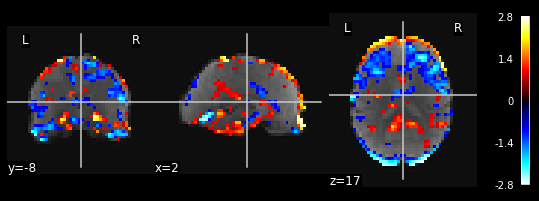

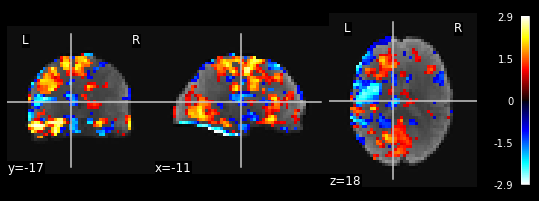

In [ ]:
# Finally, we display the result of the reduction operations
from nilearn import image
from nilearn.plotting import plot_stat_map, show

mean_img = image.mean_img(file_name)
plot_stat_map(image.index_img(component_img, 0), mean_img)
plot_stat_map(image.index_img(component_img, 1), mean_img);